In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [24]:
COL_NAME = {0:"num_img", 1:"num_face", 2:"num_eye", 3:"confidence", 4:"x", 5:"y", 6:"w", 7:"h", 8:"time_stamp"}
DF_NAME = ["concentration", "glass", "non_concentration", "phone", "phone_under", "sleep", "another_person"]

In [9]:
def making_df(path = "./analysis_data/", 
              lst = DF_NAME, 
              extension = ".txt") :

    result = []
    
    for name in lst :
        df = pd.DataFrame(columns =["num_img", "num_face", "num_eye", "confidence", "x", "y", "w", "h", "time_stamp"] )
        for idx in range(5) :
            try :
                full_path = path + name + str(idx) + extension
                temp = pd.read_csv(full_path, header=None).rename(columns = COL_NAME)
                df = pd.concat([df, temp])
            except :
                pass
            
        result.append(df.reset_index().drop("index", axis=1))
    return result

In [10]:
df_lst = making_df()
concentration, glasses, non_concentration, phone, phone_under, sleep, another_persion = df_lst

In [39]:
def get_specific(col_num, lst=df_lst) :
    lst = [df[COL_NAME[col_num]].tolist() for df in df_lst]
    return np.array(lst)

In [40]:
img_value = get_specific(0)
face_value = get_specific(1)
eye_value = get_specific(2)
con_value = get_specific(3)

In [41]:
def graph(lst, idxes=[0,1,2,3,4,5,6], labels=DF_NAME) :
    fig, ax = plt.subplots()
    rng = list(range(60))

    for idx in idxes :
        ax.plot(rng, lst[idx], label=DF_NAME[idx])

    legend = ax.legend()
    plt.xlabel('period')
    plt.ylabel('value')
    plt.title('confidence')
    plt.show()

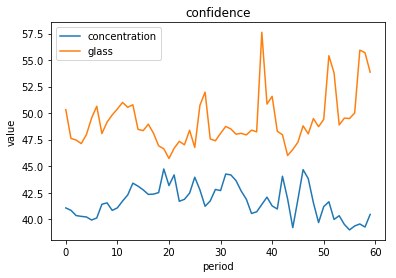

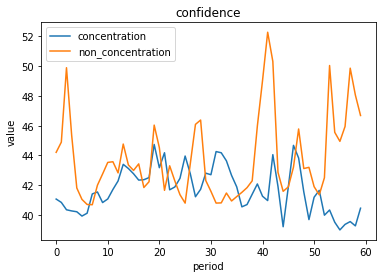

In [42]:
graph(con_value, [0, 1])
graph(con_value, [0, 2])

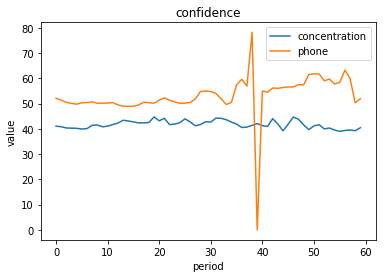

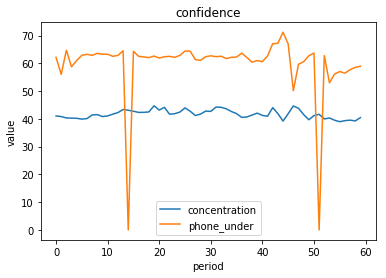

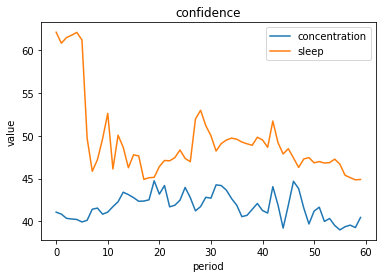

In [43]:
graph(con_value, [0, 3])
graph(con_value, [0, 4])
graph(con_value, [0, 5])

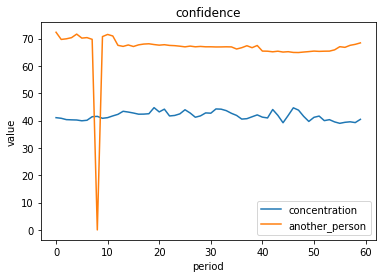

In [44]:
graph(con_value, [0, 6])

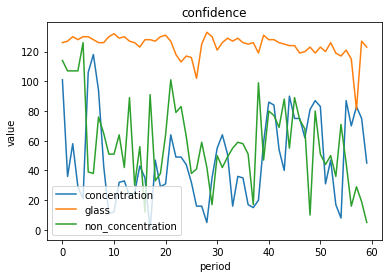

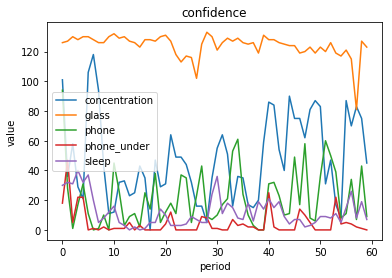

In [46]:
graph(eye_value, [0, 1, 2])
graph(eye_value, [0, 1, 3, 4, 5])

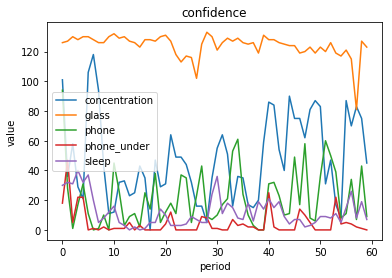

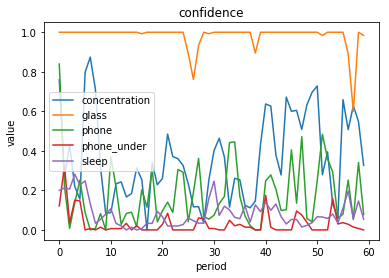

In [57]:
eye_per_img = eye_value / img_value
graph(eye_value, [0, 1, 3, 4, 5])
graph(eye_per_img, [0, 1, 3, 4, 5])

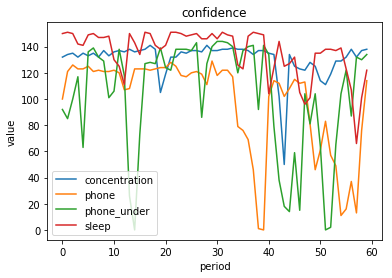

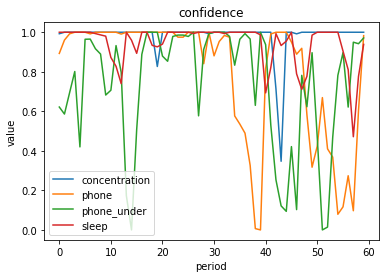

In [56]:
face_per_img = face_value / img_value
graph(face_value, [0, 3, 4, 5])
graph(face_per_img, [0, 3, 4, 5])

C:\Users\kimhyunwoo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


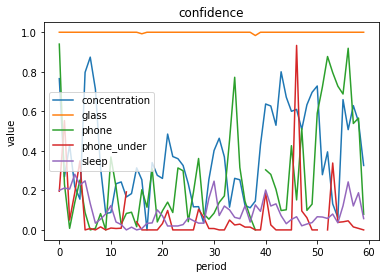

In [58]:
eye_per_face = eye_value / face_value
graph(eye_per_face, [0, 1, 3, 4, 5])

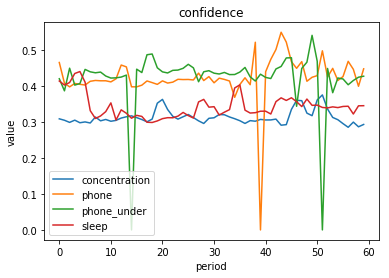

In [60]:
concentration_per_img = con_value / img_value
graph(concentration_per_img, [0, 3, 4, 5])